# Einstein Tensor calculations using Symbolic module

In [34]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor

sympy.init_printing()

### Defining our time dependent metric as from equation 31
https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.html

Kasner eqn 31
10.1139/cjp-2017-1001

In [38]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, w = sympy.symbols("G M c a w")
a = M*(sin(w*syms[0])**2)
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = (1 - (a / syms[1]))* (c ** 2)
list2d[1][1] = -1 / (1 - (a / syms[1])) 
list2d[2][2] = -1 * (syms[1] ** 2) 
list2d[3][3] = -1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


⎡   ⎛       2         ⎞                                     ⎤
⎢ 2 ⎜  M⋅sin (t⋅w)    ⎟                                     ⎥
⎢c ⋅⎜- ─────────── + 1⎟          0           0        0     ⎥
⎢   ⎝       r         ⎠                                     ⎥
⎢                                                           ⎥
⎢                               -1                          ⎥
⎢          0             ─────────────────   0        0     ⎥
⎢                               2                           ⎥
⎢                          M⋅sin (t⋅w)                      ⎥
⎢                        - ─────────── + 1                  ⎥
⎢                               r                           ⎥
⎢                                                           ⎥
⎢                                             2             ⎥
⎢          0                     0          -r        0     ⎥
⎢                                                           ⎥
⎢                                                  2    2   ⎥
⎣       

### Calculating the Einstein Tensor (with both indices covariant)

In [75]:
einst = EinsteinTensor.from_metric(sch)
einst.tensor()

/usr/local/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/usr/local/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/usr/local/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/usr/local/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBackendBitmap clas

⎡           ⎛       2         ⎞                                               
⎢         2 ⎜  M⋅sin (t⋅w)    ⎟ ⎛       4               2               2     
⎢1.0⋅M⋅r⋅w ⋅⎜- ─────────── + 1⎟⋅⎝2⋅M⋅sin (t⋅w) - 3⋅M⋅sin (t⋅w) + 2⋅r⋅sin (t⋅w)
⎢           ⎝       r         ⎠                                               
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                 3                           
⎢                                ⎛     2         ⎞                            
⎢                                ⎝M⋅sin (t⋅w) - r⎠                            
⎢                                                                             
⎢                                                                             
⎢                                                                M⋅w⋅sin(2⋅t⋅w
⎢                                                            ─────────────────
⎢                                                   

Text(0.5, 1.0, 'T_01')

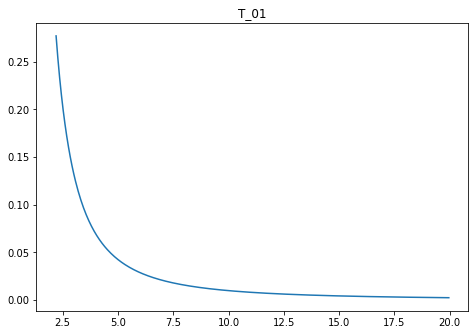

In [77]:
#Plot something
args, func = einst.tensor_lambdify()
args

x = np.arange(2.2, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1, 1)[0][1]


y = func(1.0,x,1, 1, 1, 1, 1)[0][1]
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.set_title("T_01")


